<a href="https://colab.research.google.com/github/yumnakm/FP-Data-Mining-Kelompok-7/blob/main/FP_KEL7_DATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_excel('/content/drive/MyDrive/Data Mining/StrukDetail.xlsx', header=5)

In [6]:
data.head()

,NO,TANGGAL,NO.TRANSAKSI,BARCODE,ITEM,QTY,KEMASAN,NOMINAL PENJUALAN,DISC,TOTAL PENJUALAN,TOTAL HPP,KEUNTUNGAN,MARGIN (%)
0,1,2025-11-17 06:34:10.590,202511170001,8991002121003,GOOD DAY TIRAMISU COFFEE 250ML,1,PCS,6500,0,6500,5557.29,942.71,15
1,2,2025-11-17 06:34:10.590,202511170001,8997010570024,SANTRI BOTOL 600ML,1,PCS,3000,0,3000,1291.16,1708.84,57
2,3,2025-11-17 06:52:40.820,202511170002,8992772195157,KISPRAY ELEGANTE 318ML,1,PCS,18300,0,18300,15960.43,2339.57,13
3,4,2025-11-17 06:52:40.820,202511170002,8993500212047,JANGKRIK MAS S.SEREH 10X2TAB/P,1,PCS,12200,0,12200,9800.00,2400.00,20
4,5,2025-11-17 06:56:42.610,202511170003,8993137572170,WARDAH LIGHT DAY CRM S2/30GR,1,PCS,48000,0,48000,40268.16,7731.84,16


Eksplorasi Data

In [7]:
data.shape

(2321, 13)

In [8]:
data.describe()

,NO,NO.TRANSAKSI,QTY,NOMINAL PENJUALAN,DISC,TOTAL PENJUALAN,TOTAL HPP,KEUNTUNGAN,MARGIN (%)
count,2321.000000,2.321000e+03,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000
mean,1161.000000,2.025112e+11,1.362344,19803.834554,105.547178,19698.287376,16708.844227,2989.443150,18.302025
std,670.159309,2.051775e+04,1.277840,32515.369018,693.824501,32392.008181,28118.931409,4964.981328,8.825689
min,1.000000,2.025112e+11,1.000000,1000.000000,0.000000,1000.000000,462.000000,-950.000000,-6.000000
25%,581.000000,2.025112e+11,1.000000,5500.000000,0.000000,5300.000000,4185.330000,1000.000000,13.000000
50%,1161.000000,2.025112e+11,1.000000,10000.000000,0.000000,10000.000000,8325.000000,1741.000000,17.000000
75%,1741.000000,2.025112e+11,1.000000,20500.000000,0.000000,20000.000000,17010.750000,3062.190000,21.000000
max,2321.000000,2.025112e+11,40.000000,460000.000000,14400.000000,460000.000000,375001.000000,84999.000000,84.000000


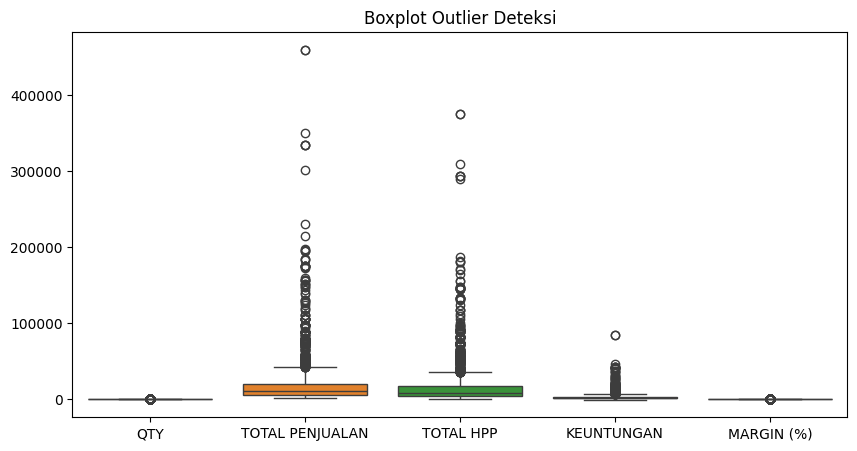

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['QTY','TOTAL PENJUALAN','TOTAL HPP','KEUNTUNGAN','MARGIN (%)']

plt.figure(figsize=(10,5))
sns.boxplot(data=data[num_cols])
plt.title("Boxplot Outlier Deteksi")
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NO                 2321 non-null   int64  
 1   TANGGAL            2321 non-null   object 
 2   NO.TRANSAKSI       2321 non-null   int64  
 3   BARCODE            2321 non-null   object 
 4   ITEM               2321 non-null   object 
 5   QTY                2321 non-null   int64  
 6   KEMASAN            2321 non-null   object 
 7   NOMINAL PENJUALAN  2321 non-null   int64  
 8   DISC               2321 non-null   int64  
 9   TOTAL PENJUALAN    2321 non-null   int64  
 10  TOTAL HPP          2321 non-null   float64
 11  KEUNTUNGAN         2321 non-null   float64
 12  MARGIN (%)         2321 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 235.9+ KB


In [11]:
data.isnull().sum()

,0
NO,0
TANGGAL,0
NO.TRANSAKSI,0
BARCODE,0
ITEM,0
QTY,0
KEMASAN,0
NOMINAL PENJUALAN,0
DISC,0
TOTAL PENJUALAN,0


In [12]:
data.loc[data['ITEM'] == 'NONE', :].count()

,0
NO,0
TANGGAL,0
NO.TRANSAKSI,0
BARCODE,0
ITEM,0
QTY,0
KEMASAN,0
NOMINAL PENJUALAN,0
DISC,0
TOTAL PENJUALAN,0


In [13]:
#mencari jumlah jenis item dari menu yang dijual
data['ITEM'].nunique()

1258

In [14]:
data["NO.TRANSAKSI"].nunique()

821

In [15]:
data['ITEM'].value_counts().sort_values(ascending=False).head(10)

,count
ITEM,
SANTRI BOTOL 600ML,42
AIR SANTRI GALON,40
SANTRI BOTOL 330ML,25
INDOMIE GORENG SPECIAL 85 GR,24
M/GORENG ROSE BRAND 2 LTR,19
SANTRI BOTOL 1500ML,18
AIR SANTRI 240ML KARTON,17
LE MINERALE AIR MINUM 1500/PC,17
CLEO SMART PET 220 ML,14


In [16]:
data['TANGGAL'] = pd.to_datetime(data['TANGGAL'])

In [17]:
data['WAKTU'] = data['TANGGAL'].dt.hour

In [18]:
data['Daytime'] = pd.cut(
    data['WAKTU'],
    bins=[0, 12, 17, 21, 24],
    labels=['Pagi', 'Siang', 'Sore', 'Malam'],
    right=False
)


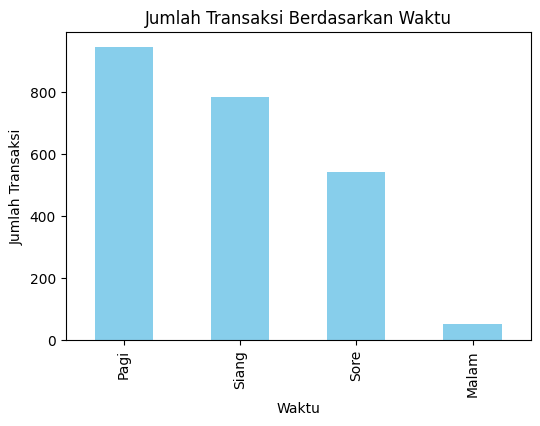

In [19]:
#EDA 1 - Waktu Transaksi paling sibuk
plt.figure(figsize=(6,4))
data.groupby('Daytime')['NO.TRANSAKSI'].count().plot(kind='bar', color='skyblue')
plt.title('Jumlah Transaksi Berdasarkan Waktu')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Waktu')
plt.show()

In [20]:
#jumlah item yang terjual pada waktu operasi minimarket
data.groupby('Daytime')['ITEM'].count().sort_values(ascending=False)

,ITEM
Daytime,
Pagi,945
Siang,784
Sore,540
Malam,52


In [21]:
data['WAKTU'].describe()


,WAKTU
count,2321.000000
mean,12.950022
std,4.445756
min,6.000000
25%,9.000000
50%,13.000000
75%,17.000000
max,21.000000


Text(0.5, 1.0, 'Best Sellers')

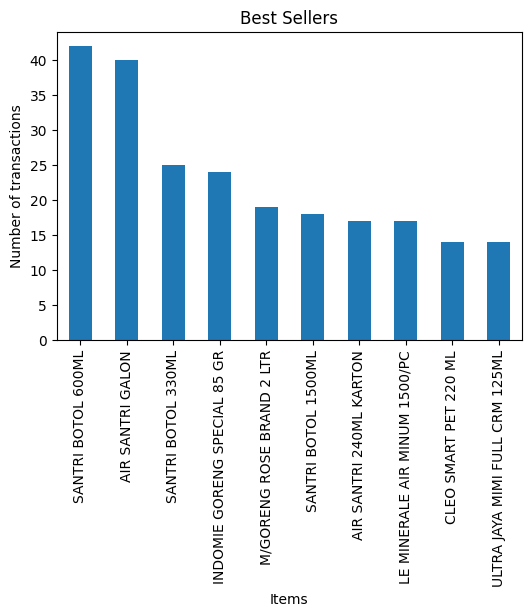

In [22]:
#EDA 2 — Top Produk Terlaris
fig, ax=plt.subplots(figsize=(6,4))
data['ITEM'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of transactions')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best Sellers')

In [23]:
data['ITEM'].value_counts().head(10)

,count
ITEM,
SANTRI BOTOL 600ML,42
AIR SANTRI GALON,40
SANTRI BOTOL 330ML,25
INDOMIE GORENG SPECIAL 85 GR,24
M/GORENG ROSE BRAND 2 LTR,19
SANTRI BOTOL 1500ML,18
LE MINERALE AIR MINUM 1500/PC,17
AIR SANTRI 240ML KARTON,17
ULTRA JAYA MIMI FULL CRM 125ML,14


In [24]:
top_revenue = data.groupby('ITEM')['TOTAL PENJUALAN'].sum().sort_values(ascending=False).head(10)
top_revenue

,TOTAL PENJUALAN
ITEM,
SANTRI BOTOL 330ML,2720000
SANTRI BOTOL 600ML,2205000
AIR SANTRI GALON,2116000
AIR SANTRI 240ML KARTON,1774000
SEDAP WANGI BERAS 5KG,1138500
M/GORENG ROSE BRAND 2 LTR,1055600
SUMO MERAH BERAS 5KG,882000
SUMO KUNING BERAS 5 KG,704000
CLEO SMART PET 220 ML,623500


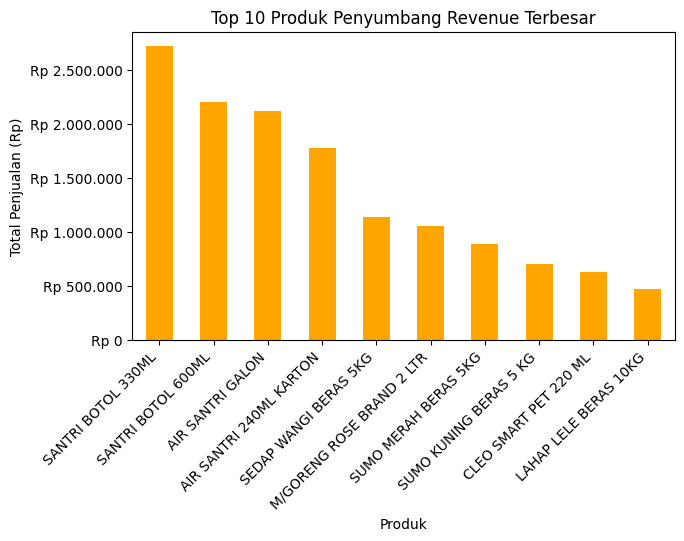

In [25]:
#EDA 3 — Revenue / Pendapatan per Produk
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = top_revenue.plot(kind='bar', figsize=(7,4), color='orange')
plt.title('Top 10 Produk Penyumbang Revenue Terbesar')
plt.ylabel('Total Penjualan (Rp)')
plt.xlabel('Produk')
plt.xticks(rotation=45, ha='right')

# Format sumbu Y ke Rupiah normal
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'Rp {int(x):,}'.replace(',', '.')))

plt.show()

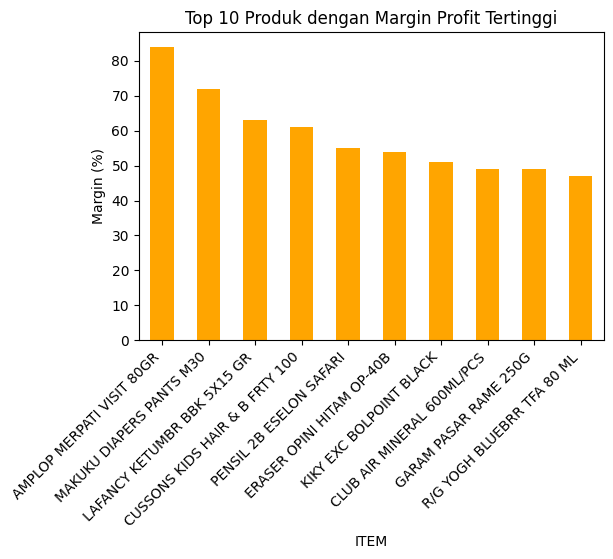

In [26]:
#EDA 4 — Margin vs Produk
top_margin = data.groupby('ITEM')['MARGIN (%)'].mean().sort_values(ascending=False).head(10)
top_margin.plot(kind='bar', figsize=(6,4), color='orange')
plt.title('Top 10 Produk dengan Margin Profit Tertinggi')
plt.ylabel('Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
top_margin = data.groupby('ITEM')['MARGIN (%)'].mean().sort_values(ascending=False).head(10)
top_margin

,MARGIN (%)
ITEM,
AMPLOP MERPATI VISIT 80GR,84.0
MAKUKU DIAPERS PANTS M30,72.0
LAFANCY KETUMBR BBK 5X15 GR,63.0
CUSSONS KIDS HAIR & B FRTY 100,61.0
PENSIL 2B ESELON SAFARI,55.0
ERASER OPINI HITAM OP-40B,54.0
KIKY EXC BOLPOINT BLACK,51.0
CLUB AIR MINERAL 600ML/PCS,49.0
GARAM PASAR RAME 250G,49.0


In [28]:
data = data[["NO.TRANSAKSI", "ITEM"]].copy()
data.columns = ["transaction_id", "item"]

In [29]:
data.groupby("transaction_id")["item"].count().mean()

np.float64(2.8270401948842876)

In [30]:
data["item"] = (
    data["item"]
    .str.upper()
    .str.replace(r"[^A-Z0-9 ]", " ", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

In [31]:
data.head()

,transaction_id,item
0,202511170001,GOOD DAY TIRAMISU COFFEE 250ML
1,202511170001,SANTRI BOTOL 600ML
2,202511170002,KISPRAY ELEGANTE 318ML
3,202511170002,JANGKRIK MAS S SEREH 10X2TAB P
4,202511170003,WARDAH LIGHT DAY CRM S2 30GR


In [32]:
data = data.drop_duplicates(["transaction_id", "item"])

In [33]:
transactions = (
    data.groupby("transaction_id")["item"]
      .apply(list)
      .tolist()
)

In [34]:
transactions[:10]

[['GOOD DAY TIRAMISU COFFEE 250ML', 'SANTRI BOTOL 600ML'],
 ['KISPRAY ELEGANTE 318ML', 'JANGKRIK MAS S SEREH 10X2TAB P'],
 ['WARDAH LIGHT DAY CRM S2 30GR',
  'WARDAH SHAMPO NUTRI SH 170 PCS',
  'KUNCI BIRU TERIGU 1KG PCK',
  'SUNCO MINYAK GORENG REF 2L',
  'SUN SWALLOW WOMEN 9 5K',
  'MEIJI HELLO PANDA MILK 45G',
  'NOODLE EKOMIE 6X10',
  'SOKLIN LIQ LAVENDER NATU565ML'],
 ['BERAS SUMO KUNING 3 KG', 'JAPOTA ORIGINAL 68GR'],
 ['GOOD TIME CLASSIC MPL 26 5 G',
  'GORIORIO VANILA 23 GR',
  'KIKY EXC BOLPOINT BLACK',
  'IKAWA TOAST SELAI VANIL 60 GR',
  'SANTRI BOTOL 1500ML',
  'MILKITA BITES 24 GR'],
 ['COLLAGENA SUSU STERIL 189ML'],
 ['PUCUK HARUM LESS SUGAR 350 ML', 'NARAYA SOYA PET 320ML'],
 ['TICTAC MI GORENG 80 GR',
  'SANTRI BOTOL 1500ML',
  'ULTRA JAYA UHT FULL CREM 250ML',
  'ULTRA JAYA SARI KCNG IJO 250ML'],
 ['DAHLIA AIR FRESH TEH KERATON',
  'LAURIER SUPER MAXI WING 10S P',
  'ULTRA JAYA MIMI FULL CRM 125ML',
  'WCC MINI PUDDING 14GR 4CUP',
  'SOKLIN PEMUTIH RGL 250 ML'],
 ['IND

In [35]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# One-hot encoding
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)

# Apriori dengan support rendah
frequent_items = apriori(basket,
                         min_support=0.003,
                         use_colnames=True)

# ambil 10 item dengan support tertinggi
top_items = frequent_items.sort_values("support", ascending=False).head(10)["itemsets"].apply(lambda x: list(x)[0])
basket[top_items].head(15)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,SANTRI BOTOL 600ML,AIR SANTRI GALON,SANTRI BOTOL 330ML,INDOMIE GORENG SPECIAL 85 GR,M GORENG ROSE BRAND 2 LTR,SANTRI BOTOL 1500ML,AIR SANTRI 240ML KARTON,LE MINERALE AIR MINUM 1500 PC,ULTRA JAYA MIMI FULL CRM 125ML,CLEO SMART PET 220 ML
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [36]:
# Apriori dengan support rendah
frequent_items = apriori(basket,
                         min_support=0.003,
                         use_colnames=True)

frequent_items.sort_values(by="support", ascending=False).head(20)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,support,itemsets
146,0.049939,(SANTRI BOTOL 600ML)
5,0.048721,(AIR SANTRI GALON)
145,0.029233,(SANTRI BOTOL 330ML)
64,0.029233,(INDOMIE GORENG SPECIAL 85 GR)
104,0.023143,(M GORENG ROSE BRAND 2 LTR)
144,0.021924,(SANTRI BOTOL 1500ML)
4,0.020706,(AIR SANTRI 240ML KARTON)
99,0.020706,(LE MINERALE AIR MINUM 1500 PC)
177,0.017052,(ULTRA JAYA MIMI FULL CRM 125ML)
21,0.017052,(CLEO SMART PET 220 ML)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [37]:
# Generate rules
rules = association_rules(frequent_items,
                          metric="confidence",
                          min_threshold=0.1)

# Sorting rule
rules = rules.sort_values(["lift", "confidence"], ascending=False)

rules.head(20)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
25,(WAKU WAKU CHOCO DINOSAUR 50ML),(WAKU WAKU MANGOLOOP 35 ML),0.003654,0.004872,0.003654,1.000000,205.250000,1.0,0.003636,inf,0.998778,0.750000,1.000000,0.875000
24,(WAKU WAKU MANGOLOOP 35 ML),(WAKU WAKU CHOCO DINOSAUR 50ML),0.004872,0.003654,0.003654,0.750000,205.250000,1.0,0.003636,3.985384,1.000000,0.750000,0.749083,0.875000
5,(GOOD DAY AVOCADO DELIGHT 250ML),(TEH PUCUK HARUM 1 36 LTR),0.004872,0.006090,0.003654,0.750000,123.150000,1.0,0.003624,3.975639,0.996736,0.500000,0.748468,0.675000
6,(TEH PUCUK HARUM 1 36 LTR),(GOOD DAY AVOCADO DELIGHT 250ML),0.006090,0.004872,0.003654,0.600000,123.150000,1.0,0.003624,2.487820,0.997958,0.500000,0.598042,0.675000
7,(INDOMIE KALDU AYAM 65G),(INDM GORENG KRIUK 90GR),0.004872,0.008526,0.003654,0.750000,87.964286,1.0,0.003613,3.965895,0.993472,0.375000,0.747850,0.589286
8,(INDM GORENG KRIUK 90GR),(INDOMIE KALDU AYAM 65G),0.008526,0.004872,0.003654,0.428571,87.964286,1.0,0.003613,1.741474,0.997133,0.375000,0.425774,0.589286
22,(YUPI PIZZA BOX),(NESTLE PURE LIFE 600ML),0.007308,0.009744,0.003654,0.500000,51.312500,1.0,0.003583,1.980512,0.987730,0.272727,0.495080,0.437500
21,(NESTLE PURE LIFE 600ML),(YUPI PIZZA BOX),0.009744,0.007308,0.003654,0.375000,51.312500,1.0,0.003583,1.588307,0.990160,0.272727,0.370399,0.437500
19,(SASA SANTAN KELAPA 200ML),(M GORENG ROSE BRAND 2 LTR),0.003654,0.023143,0.003654,1.000000,43.210526,1.0,0.003570,inf,0.980440,0.157895,1.000000,0.578947
20,(M GORENG ROSE BRAND 2 LTR),(SASA SANTAN KELAPA 200ML),0.023143,0.003654,0.003654,0.157895,43.210526,1.0,0.003570,1.183161,1.000000,0.157895,0.154806,0.578947


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [38]:
filtered_rules = rules[
    (rules["confidence"] >= 0.75) &
    (rules["lift"] >= 1.1)
]

filtered_rules.head(20)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
25,(WAKU WAKU CHOCO DINOSAUR 50ML),(WAKU WAKU MANGOLOOP 35 ML),0.003654,0.004872,0.003654,1.00,205.250000,1.0,0.003636,inf,0.998778,0.750000,1.000000,0.875000
24,(WAKU WAKU MANGOLOOP 35 ML),(WAKU WAKU CHOCO DINOSAUR 50ML),0.004872,0.003654,0.003654,0.75,205.250000,1.0,0.003636,3.985384,1.000000,0.750000,0.749083,0.875000
5,(GOOD DAY AVOCADO DELIGHT 250ML),(TEH PUCUK HARUM 1 36 LTR),0.004872,0.006090,0.003654,0.75,123.150000,1.0,0.003624,3.975639,0.996736,0.500000,0.748468,0.675000
7,(INDOMIE KALDU AYAM 65G),(INDM GORENG KRIUK 90GR),0.004872,0.008526,0.003654,0.75,87.964286,1.0,0.003613,3.965895,0.993472,0.375000,0.747850,0.589286
19,(SASA SANTAN KELAPA 200ML),(M GORENG ROSE BRAND 2 LTR),0.003654,0.023143,0.003654,1.00,43.210526,1.0,0.003570,inf,0.980440,0.157895,1.000000,0.578947
18,(INDOMIE SOTO SPESIAL 75G),(INDOMIE GORENG SPECIAL 85 GR),0.003654,0.029233,0.003654,1.00,34.208333,1.0,0.003547,inf,0.974328,0.125000,1.000000,0.562500
3,(CREMDET EKONOMI VIOLET 512G),(M GORENG ROSE BRAND 2 LTR),0.004872,0.023143,0.003654,0.75,32.407895,1.0,0.003541,3.907430,0.973888,0.150000,0.744077,0.453947


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [39]:
produk_minuman = ['WAKU', 'GOOD DAY', 'TEH', 'NESTLE']
makanan_instan = ['INDOMIE', 'YUPI']

def evaluasi_apriori(min_support, min_conf, min_lift=None, fokus_item=None):
    freq = apriori(basket, min_support=min_support, use_colnames=True)
    rules = association_rules(freq, metric="confidence", min_threshold=min_conf)

    # Filter lift
    if min_lift is not None:
        rules = rules[rules["lift"] >= min_lift]

    # Filter fokus item
    if fokus_item is not None:
        if 'antecedent_str' not in rules.columns:
            rules['antecedent_str'] = rules['antecedents'].apply(lambda x: next(iter(x)))
        if 'consequent_str' not in rules.columns:
            rules['consequent_str'] = rules['consequents'].apply(lambda x: next(iter(x)))

        rules = rules[
            rules['antecedent_str'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in fokus_item)) |
            rules['consequent_str'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in fokus_item))
        ]

    return {
        "Min Support": min_support,
        "Min Confidence": min_conf,
        "Min Lift": min_lift if min_lift is not None else "-",
        "Jumlah Rules": rules.shape[0],
        "Rata-rata Support": rules["support"].mean(),
        "Rata-rata Confidence": rules["confidence"].mean(),
        "Rata-rata Lift": rules["lift"].mean()
    }
hasil = pd.DataFrame([
    # Skenario 1 – Default Rule Discovery
    evaluasi_apriori(0.003, 0.1),

    # Skenario 2 – Filter Berdasarkan Confidence
    evaluasi_apriori(0.003, 0.5, min_lift=1),

    # Skenario 3 – Rule untuk Rekomendasi Bundling
    evaluasi_apriori(0.003, 0.75, min_lift=1.1),

    # Skenario 4 – Pola Produk Paling Populer
    evaluasi_apriori(0.006, 0.3, min_lift=1),

    # Skenario 5 – Pola Pembelian Konsumen Umum
    evaluasi_apriori(0.005, 0.4, min_lift=1),

    # Skenario 6 – Rule dengan Dampak Asosiasi Tinggi
    evaluasi_apriori(0.003, 0.6, min_lift=1.3),

    # Skenario 7 – Bundling Produk Minuman
    evaluasi_apriori(0.003, 0.5, min_lift=1.2, fokus_item=produk_minuman),

    # Skenario 8 – Bundling Produk Makanan Instan
    evaluasi_apriori(0.003, 0.6, min_lift=1.2, fokus_item=makanan_instan),

    # Skenario 9 – Rule dengan Support Tinggi
    evaluasi_apriori(0.006, 0.3, min_lift=1), # Adjusted min_support

    # Skenario 10 – Rule Paling Ideal untuk Implementasi
    evaluasi_apriori(0.005, 0.7, min_lift=1.2)

], index=[
    "Skenario 1", "Skenario 2", "Skenario 3", "Skenario 4", "Skenario 5",
    "Skenario 6", "Skenario 7", "Skenario 8", "Skenario 9", "Skenario 10"
])

hasil

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,Min Support,Min Confidence,Min Lift,Jumlah Rules,Rata-rata Support,Rata-rata Confidence,Rata-rata Lift
Skenario 1,0.003,0.10,-,26,0.004450,0.471749,52.930132
Skenario 2,0.003,0.50,1,12,0.004060,0.747487,80.822308
Skenario 3,0.003,0.75,1.1,7,0.003654,0.857143,104.491577
Skenario 4,0.006,0.30,1,2,0.006090,0.634921,21.719577
Skenario 5,0.005,0.40,1,2,0.006090,0.634921,21.719577
Skenario 6,0.003,0.60,1.3,10,0.003898,0.791429,89.955056
Skenario 7,0.003,0.50,1.2,5,0.003654,0.720000,141.622500
Skenario 8,0.003,0.60,1.2,4,0.004263,0.766071,41.783036
Skenario 9,0.006,0.30,1,2,0.006090,0.634921,21.719577
Skenario 10,0.005,0.70,1.2,1,0.006090,0.714286,24.434524


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

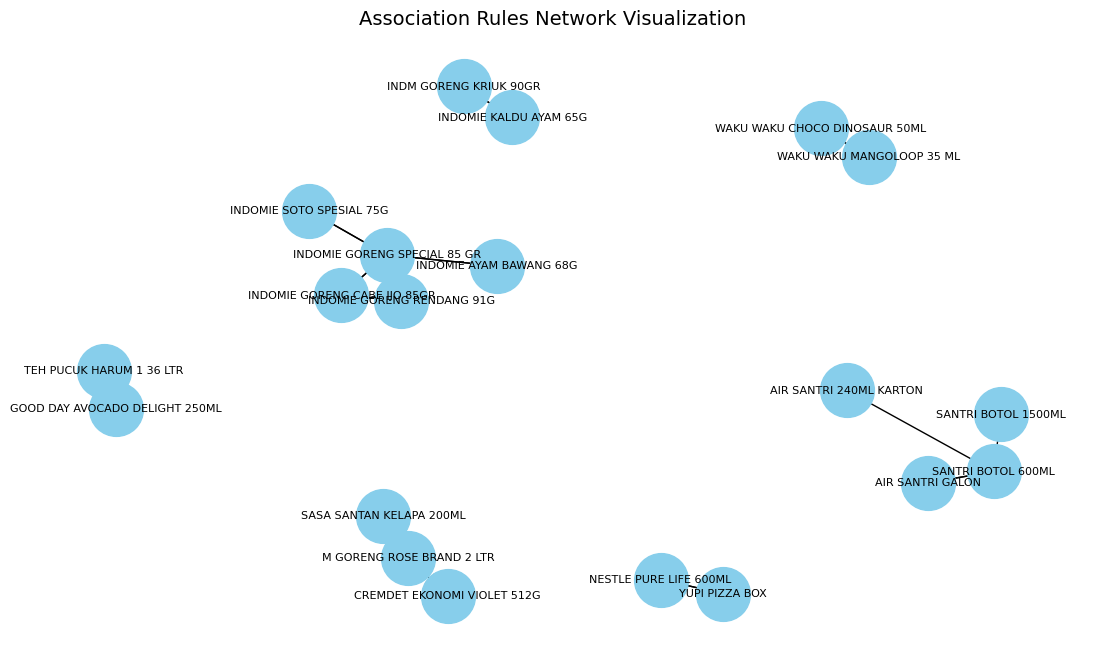

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Ubah set antecedents & consequents jadi string sederhana ---

# Ambil isi pertama dari set → contoh: {'INDOMIE AYAM'} → 'INDOMIE AYAM'
rules['antecedent_str'] = rules['antecedents'].apply(lambda x: next(iter(x)))
rules['consequent_str'] = rules['consequents'].apply(lambda x: next(iter(x)))

# --- 2. Buat graph dari dataframe ---

G = nx.from_pandas_edgelist(
    rules,
    source='antecedent_str',
    target='consequent_str',
    edge_attr=True,
    create_using=nx.DiGraph()   # graf berarah (A → B)
)

# --- 3. Atur ukuran gambar ---
plt.figure(figsize=(14, 8))

# --- 4. Pilih layout graph ---
pos = nx.spring_layout(G, k=0.4, seed=42)   # biar rapi dan konsisten

# --- 5. Gambar node & edge ---
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=8)

# --- 6. Judul ---
plt.title("Association Rules Network Visualization", fontsize=14)
plt.axis("off")
plt.show()


In [41]:
!pip install pyngrok streamlit

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 6.9/6.9 MB 145.9 MB/s eta 0:00:01

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.8 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [42]:
from pyngrok import ngrok
ngrok.set_auth_token("37COxDnS3nT0xEKczmwvNoXohpL_66iwADiVykfnLkuCyacEp")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [43]:
!streamlit run app.py &>/content/log.txt &

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [44]:
public_url = ngrok.connect(8501)
public_url

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

<NgrokTunnel: "https://coloristic-calista-nonmodificative.ngrok-free.dev" -> "http://localhost:8501">

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [45]:
%%writefile app.py
import streamlit as st
import pandas as pd
import ast

# =========================
# LOAD DATA
# =========================
df = pd.read_csv("association_rules.csv")

df["antecedents"] = df["antecedent_str"].apply(lambda x: frozenset(ast.literal_eval(x)))
df["consequents"] = df["consequent_str"].apply(lambda x: frozenset(ast.literal_eval(x)))

# Ambil semua produk unik
produk_list = sorted(
    set(item for sub in df["antecedents"] for item in sub)
)

# =========================
# STREAMLIT CONFIG
# =========================
st.set_page_config(page_title="Rekomendasi Bundling Produk", layout="wide")
st.title("🛒 Analisis Produk Bundling")
st.caption("Berdasarkan Association Rule (Apriori)")

# =========================
# SIDEBAR
# =========================
st.sidebar.header("🔍 Parameter Analisis")

selected_product = st.sidebar.selectbox(
    "Pilih Produk Utama",
    produk_list
)

min_support = st.sidebar.slider("Minimum Support", 0.001, float(df["support"].max()), 0.003, 0.0005)
min_confidence = st.sidebar.slider("Minimum Confidence", 0.0, 1.0, 0.6, 0.05)
min_lift = st.sidebar.slider("Minimum Lift", 1.0, float(df["lift"].max()), 1.2, 0.1)

# =========================
# FILTER RULES
# =========================
filtered_rules = df[
    (df["support"] >= min_support) &
    (df["confidence"] >= min_confidence) &
    (df["lift"] >= min_lift) &
    (df["antecedents"].apply(lambda x: selected_product in x))
]

filtered_rules = filtered_rules.sort_values(by="lift", ascending=False)

# =========================
# MAIN LAYOUT
# =========================
col1, col2 = st.columns([2, 4])

# ---------- PRODUK UTAMA ----------
with col1:
    st.subheader("📦 Produk Utama")
    st.markdown(f"### 🧴 {selected_product}")
    st.metric("Jumlah Rule", len(filtered_rules))

# ---------- BUNDLING ----------
with col2:
    st.subheader("➕ Rekomendasi Bundling")

    if filtered_rules.empty:
        st.warning("Tidak ada rekomendasi dengan parameter saat ini")
    else:


Writing app.py


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [46]:
%%writefile app.py
import streamlit as st
import pandas as pd

# =========================
# DATA MANUAL (HASIL APRIORI)
# =========================
data = [
    ["WAKU WAKU CHOCO DINOSAUR 50ML", "WAKU WAKU MANGOLOOP 35 ML", 0.003654, 0.004872, 0.003654, 1.000000, 205.250000],
    ["WAKU WAKU MANGOLOOP 35 ML", "WAKU WAKU CHOCO DINOSAUR 50ML", 0.004872, 0.003654, 0.003654, 0.750000, 205.250000],

    ["GOOD DAY AVOCADO DELIGHT 250ML", "TEH PUCUK HARUM 1 36 LTR", 0.004872, 0.006090, 0.003654, 0.750000, 123.150000],
    ["TEH PUCUK HARUM 1 36 LTR", "GOOD DAY AVOCADO DELIGHT 250ML", 0.006090, 0.004872, 0.003654, 0.600000, 123.150000],

    ["INDOMIE KALDU AYAM 65G", "INDM GORENG KRIUK 90GR", 0.004872, 0.008526, 0.003654, 0.750000, 87.964286],
    ["INDM GORENG KRIUK 90GR", "INDOMIE KALDU AYAM 65G", 0.008526, 0.004872, 0.003654, 0.428571, 87.964286],

    ["YUPI PIZZA BOX", "NESTLE PURE LIFE 600ML", 0.007308, 0.009744, 0.003654, 0.500000, 51.312500],
    ["NESTLE PURE LIFE 600ML", "YUPI PIZZA BOX", 0.009744, 0.007308, 0.003654, 0.375000, 51.312500],

    ["SASA SANTAN KELAPA 200ML", "M GORENG ROSE BRAND 2 LTR", 0.003654, 0.023143, 0.003654, 1.000000, 43.210526],
    ["M GORENG ROSE BRAND 2 LTR", "SASA SANTAN KELAPA 200ML", 0.023143, 0.003654, 0.003654, 0.157895, 43.210526],

    ["INDOMIE GORENG RENDANG 91G", "INDOMIE GORENG CABE IJO 85GR", 0.008526, 0.010962, 0.003654, 0.428571, 39.095238],
    ["INDOMIE GORENG CABE IJO 85GR", "INDOMIE GORENG RENDANG 91G", 0.010962, 0.008526, 0.003654, 0.333333, 39.095238],

    ["INDOMIE SOTO SPESIAL 75G", "INDOMIE GORENG SPECIAL 85 GR", 0.003654, 0.029233, 0.003654, 1.000000, 34.208333],
    ["INDOMIE GORENG SPECIAL 85 GR", "INDOMIE SOTO SPESIAL 75G", 0.029233, 0.003654, 0.003654, 0.125000, 34.208333],

    ["CREMDET EKONOMI VIOLET 512G", "M GORENG ROSE BRAND 2 LTR", 0.004872, 0.023143, 0.003654, 0.750000, 32.407895],
    ["M GORENG ROSE BRAND 2 LTR", "CREMDET EKONOMI VIOLET 512G", 0.023143, 0.004872, 0.003654, 0.157895, 32.407895],

    ["INDOMIE GORENG SPECIAL 85 GR", "INDOMIE GORENG RENDANG 91G", 0.029233, 0.008526, 0.006090, 0.208333, 24.434524],
    ["INDOMIE GORENG RENDANG 91G", "INDOMIE GORENG SPECIAL 85 GR", 0.008526, 0.029233, 0.006090, 0.714286, 24.434524],

    ["INDOMIE AYAM BAWANG 68G", "INDOMIE GORENG SPECIAL 85 GR", 0.006090, 0.029233, 0.003654, 0.600000, 20.525000],
    ["INDOMIE GORENG SPECIAL 85 GR", "INDOMIE AYAM BAWANG 68G", 0.029233, 0.006090, 0.003654, 0.125000, 20.525000],
]

rules = pd.DataFrame(data, columns=[
    "antecedent",
    "consequent",
    "antecedent_support",
    "consequent_support",
    "support",
    "confidence",
    "lift"
])

# =========================
# STREAMLIT CONFIG
# =========================
st.set_page_config(page_title="Analisis Apriori", layout="wide")

st.title("🛒 Analisis Pola Pembelian (Apriori)")
st.caption("Eksplorasi pola, bundling produk, dan rekomendasi peletakan toko")

# =========================
# SIDEBAR MODE
# =========================
st.sidebar.header("📌 Mode Analisis")

mode = st.sidebar.radio(
    "Pilih Jenis Analisis",
    ["Eksplorasi Awal", "Bundling Produk", "Peletakan Toko"]
)

st.sidebar.divider()

# =========================
# FILTER UMUM
# =========================
st.sidebar.subheader("🔍 Filter Aturan")

min_support = st.sidebar.slider(
    "Minimum Support",
    0.0,
    0.01,
    0.0037,
    0.0001
)


min_conf = st.sidebar.slider(
    "Minimum Confidence",
    0.0,
    1.0,
    0.5,
    0.05
)

min_lift = st.sidebar.slider(
    "Minimum Lift",
    0.5,
    300.0,
    1.0,
    0.5
)
filtered_rules = rules[
    (rules["support"] >= min_support) &
    (rules["confidence"] >= min_conf) &
    (rules["lift"] >= min_lift)
]

# =========================
# MODE 1: EKSPLORASI AWAL
# =========================
if mode == "Eksplorasi Awal":
    st.subheader("📊 Eksplorasi Awal Aturan Asosiasi")
    st.markdown(
        "Menampilkan seluruh aturan asosiasi untuk melihat pola pembelian pelanggan secara umum."
    )

    st.dataframe(
        filtered_rules[[
            "antecedent",
            "consequent",
            "support",
            "confidence",
            "lift"
        ]].sort_values(by="confidence", ascending=False)
    )
# =========================
# MODE 2: BUNDLING PRODUK
# =========================
elif mode == "Bundling Produk":
    st.subheader("➕ Rekomendasi Produk Bundling")
    st.caption(
        "Rekomendasi bundling berdasarkan frekuensi kemunculan (support), "
        "tingkat kepercayaan (confidence), dan kekuatan hubungan (lift)."
    )

    produk_list = sorted(rules["antecedent"].unique())
    selected_product = st.sidebar.selectbox(
        "Pilih Produk Utama",
        produk_list
    )

    bundling_rules = filtered_rules[
        filtered_rules["antecedent"] == selected_product
    ]

    if bundling_rules.empty:
        st.warning("Tidak ditemukan rekomendasi bundling untuk produk ini.")
    else:
        # Urutkan dari confidence tertinggi
        bundling_rules = bundling_rules.sort_values(
            by="confidence",
            ascending=False
        )

        cols = st.columns(3)
        for i, (_, row) in enumerate(bundling_rules.iterrows()):
            with cols[i % 3]:
                st.markdown(f"""
                **{row['consequent']}**
                Support: **{row['support']:.2%}**
                Confidence: **{row['confidence']:.2%}**
                Lift: **{row['lift']:.2f}**
                """)

# =========================
# MODE 3: PELETAKAN TOKO
# =========================
elif mode == "Peletakan Toko":
    st.subheader("🧭 Rekomendasi Peletakan Produk")
    st.caption(
        "Produk direkomendasikan untuk diletakkan berdekatan berdasarkan "
        "pola pembelian bersama dan kekuatan asosiasi antar produk."
    )

    produk_list = sorted(rules["antecedent"].unique())
    selected_product = st.sidebar.selectbox(
        "Pilih Produk Utama",
        produk_list
    )

    placement_rules = filtered_rules[
        filtered_rules["antecedent"] == selected_product
    ]

    if placement_rules.empty:
        st.info("Belum ada rekomendasi peletakan untuk produk ini.")
    else:
        # Urutkan dari lift tertinggi (hubungan terkuat)
        placement_rules = placement_rules.sort_values(
            by="lift",
            ascending=False
        )

        st.markdown(f"**Produk utama:** {selected_product}")
        st.markdown("Disarankan diletakkan berdekatan dengan:")

        for _, row in placement_rules.iterrows():
            st.markdown(
                f"- 🛒 **{row['consequent']}** "
                f"(Support: {row['support']:.2%}, "
                f"Confidence: {row['confidence']:.2%}, "
                f"Lift: {row['lift']:.2f})"
            )


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Overwriting app.py


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag